# Interpolation Error

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Let's fix a function to interpolate:

In [2]:
if 1:
    def f(x):
        return np.exp(1.5*x)
elif 0:
    def f(x):
        return np.sin(20*x)
else:
    def f(x):
        return (x>=0.5).astype(np.int).astype(np.float)
    

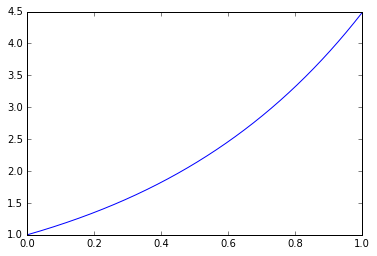

In [3]:
x_01 = np.linspace(0, 1, 1000)
pt.plot(x_01, f(x_01))

And let's fix some parameters. Note that the interpolation interval is just $[0,h]$, not $[0,1]$!

In [4]:
degree = 1
h = 1

nodes = 0.5 + np.linspace(-h/2, h/2, degree+1)
nodes

array([ 0.,  1.])

Now build the Vandermonde matrix:

In [5]:
V = np.array([
    nodes**i
    for i in range(degree+1)
]).T

In [6]:
V

array([[ 1.,  0.],
       [ 1.,  1.]])

Now find the interpolation coefficients as `coeffs`:

In [7]:
#clear
coeffs = la.solve(V, f(nodes))

Here are some points. Evaluate the interpolant there:

In [8]:
x_0h = 0.5+np.linspace(-h/2, h/2, 1000)

In [9]:
#clear
interp_0h = 0*x_0h
for i in range(degree+1):
    interp_0h += coeffs[i] * x_0h**i

Now plot the interpolant with the function:

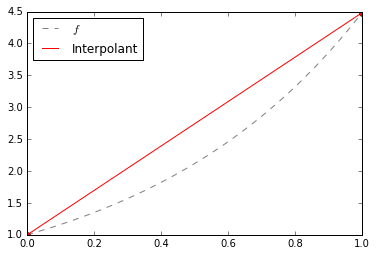

In [10]:
pt.plot(x_01, f(x_01), "--", color="gray", label="$f$")
pt.plot(x_0h, interp_0h, color="red", label="Interpolant")
pt.plot(nodes, f(nodes), "or")
pt.legend(loc="best")

Also plot the error:

Max error: 0.633384


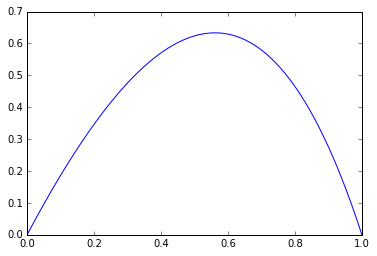

In [12]:
error = interp_0h - f(x_0h)
pt.plot(x_0h, error)
print("Max error: %g" % np.max(np.abs(error)))

* What does the error look like? (Approximately)
* How will the error react if we shrink the interval?
* What will happen if we increase the polynomial degree?